Keras Long Short Term Memory model to predict the stock price of Tata Global Beverages

In [ ]:
#import the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
dataset_train.head(20)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
dataset_train.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
from sklearn.preprocessing import MinMaxScaler #scikit-learn
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
print(training_set_scaled)

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


In [ ]:
#Incorporating Timesteps into Data - 3D array to the LSTM model.

X_train = []
Y_train = []
for i in range(60, 2035):
  X_train.append(training_set_scaled[i-60:i, 0])
  Y_train.append(training_set_scaled[i, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 19s 150ms/step - loss: 0.0120
Epoch 2/100
62/62 [==============================] - 8s 125ms/step - loss: 0.0036
Epoch 3/100
62/62 [==============================] - 9s 146ms/step - loss: 0.0029
Epoch 4/100
62/62 [==============================] - 9s 149ms/step - loss: 0.0025
Epoch 5/100
62/62 [==============================] - 8s 128ms/step - loss: 0.0023
Epoch 6/100
62/62 [==============================] - 10s 156ms/step - loss: 0.0024
Epoch 7/100
62/62 [==============================] - 12s 197ms/step - loss: 0.0021
Epoch 8/100
62/62 [==============================] - 12s 190ms/step - loss: 0.0021
Epoch 9/100
62/62 [==============================] - 9s 147ms/step - loss: 0.0022
Epoch 10/100
62/62 [==============================] - 8s 128ms/step - loss: 0.0017
Epoch 11/100
62/62 [==============================] - 13s 201ms/step - loss: 0.0019
Epoch 12/100
62/62 [==============================] - 10s 156ms/step - loss: 0.0017
Epoch 1

In [ ]:
#url = ['https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv']
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
  X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


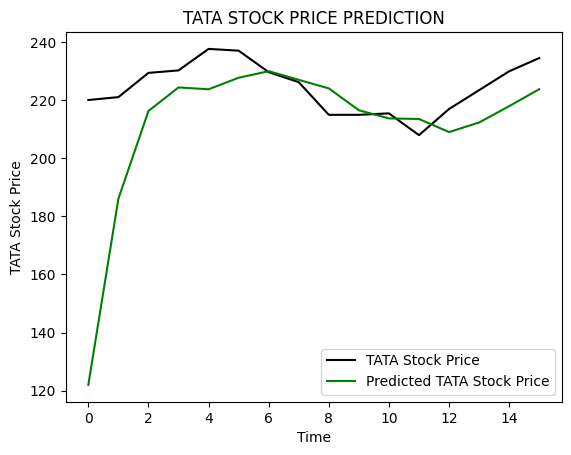

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA STOCK PRICE PREDICTION')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()